/tmp/ipykernel_22615/1876286200.py:25: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  prestamos_devueltos['month'] = prestamos_devueltos['created_at'].dt.to_period('M')


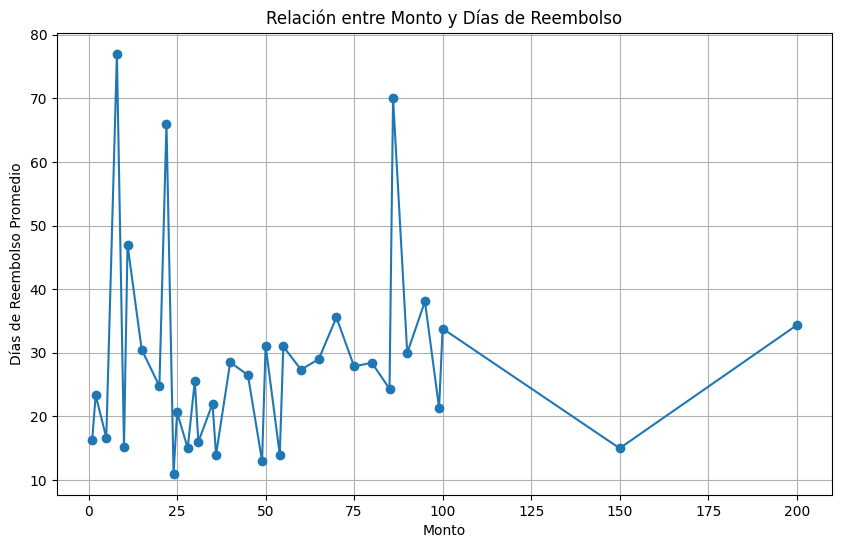

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

cash = pd.read_csv('./project_dataset/cash_request.csv')

cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'],unit='ns')
cash['reimbursement_date'] = pd.to_datetime(cash['reimbursement_date'],unit='ns')
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'],unit='ns')
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'],unit='ns')
cash['send_at'] = pd.to_datetime(cash['send_at'],unit='ns')
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'],unit='ns')
cash['reco_last_update'] = pd.to_datetime(cash['reco_last_update'],unit='ns')
cash['user_id'].fillna(cash['deleted_account_id'])

prestamos_devueltos = cash[cash['money_back_date'].notna()]
prestamos_devueltos = prestamos_devueltos[prestamos_devueltos['status'] == "money_back"]
prestamos_devueltos = prestamos_devueltos[prestamos_devueltos['money_back_date'] >= prestamos_devueltos['created_at']]
prestamos_devueltos['days_reimbursement'] = (prestamos_devueltos['money_back_date'] - prestamos_devueltos['created_at']).dt.days
prestamos_devueltos['month'] = prestamos_devueltos['created_at'].dt.to_period('M')

cohort_data_Day = prestamos_devueltos.groupby(['amount', 'month'])['days_reimbursement'].mean().reset_index()

# Calcular el promedio de 'amount' para cada valor de 'days_reimbursement'

# Visualizar la relación entre 'amount' y 'days_reimbursement'
plt.figure(figsize=(10, 6))
plt.plot(cohort_data['amount'], cohort_data['days_reimbursement'], marker='o')
plt.title('Relación entre Monto y Días de Reembolso')
plt.xlabel('Monto')
plt.ylabel('Días de Reembolso Promedio')
plt.grid(True)
plt.show()

In [121]:
cohort_data_Day

,amount,month,days_reimbursement
0,1.0,2020-04,20.000000
1,1.0,2020-05,19.000000
2,1.0,2020-06,19.000000
3,1.0,2020-10,10.333333
4,2.0,2020-06,30.000000
...,...,...,...
159,200.0,2020-03,32.500000
160,200.0,2020-04,30.000000
161,200.0,2020-05,37.200000
162,200.0,2020-06,50.000000


In [122]:
cohgort_data_cohort = cohort_data_Day.groupby(["amount").mean()
cohgort_data_cohort

days_reimbursement
amount month                      
1.0    2020-04           20.000000
       2020-05           19.000000
       2020-06           19.000000
       2020-10           10.333333
2.0    2020-06           30.000000
...                            ...
200.0  2020-03           32.500000
       2020-04           30.000000
       2020-05           37.200000
       2020-06           50.000000
       2020-07           27.333333

[164 rows x 1 columns]

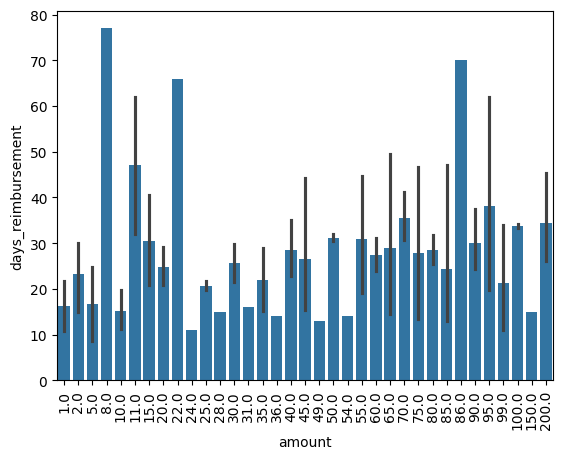

In [137]:
sns.barplot(data=prestamos_devueltos, x="amount", y="days_reimbursement", )
plt.xticks(rotation=90)
plt.show()

In [138]:
'''plt.figure(figsize=(15, 9))
plt.title('Cohort Analysis - Reimbursement days', fontsize = 14)
sns.heatmap(cohgort_data_cohort, annot=True, fmt='.0', cmap="YlGnBu")
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')

plt.show()'''

'plt.figure(figsize=(15, 9))\nplt.title(\'Cohort Analysis - Reimbursement days\', fontsize = 14)\nsns.heatmap(cohgort_data_cohort, annot=True, fmt=\'.0\', cmap="YlGnBu")\nplt.xlabel(\'Cohort Index\')\nplt.ylabel(\'Cohort Month\')\n\nplt.show()'

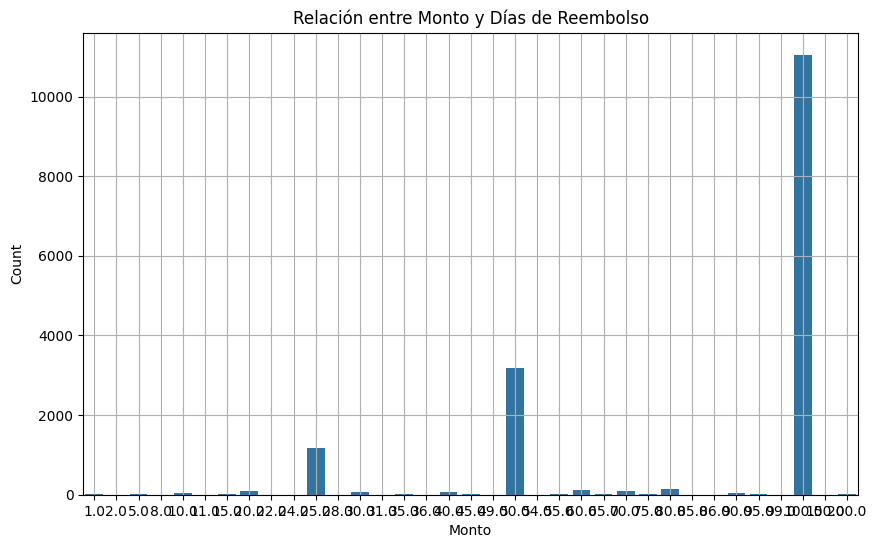

In [69]:
cohort_data2 = prestamos_devueltos.groupby('amount')['days_reimbursement'].count().reset_index()

# Visualizar la relación entre 'amount' y 'days_reimbursement'
plt.figure(figsize=(10, 6))
sns.barplot(x=cohort_data2["amount"], y=cohort_data2['days_reimbursement'], errorbar=None)
plt.title('Relación entre Monto y Días de Reembolso')
plt.xlabel('Monto')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<Axes: xlabel='amount', ylabel='days_reimbursement'>

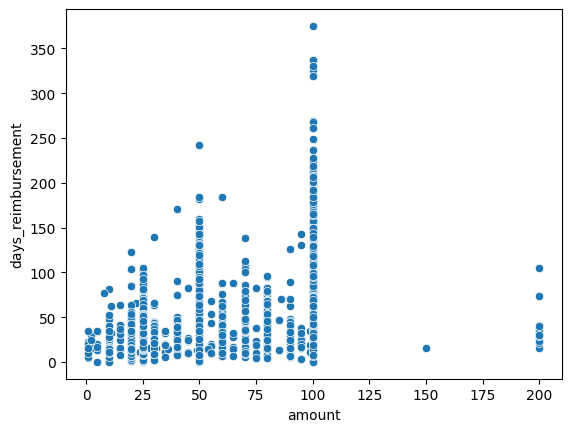

In [70]:
sns.scatterplot(data=prestamos_devueltos, x="amount", y="days_reimbursement")

<Axes: xlabel='amount', ylabel='days_reimbursement'>

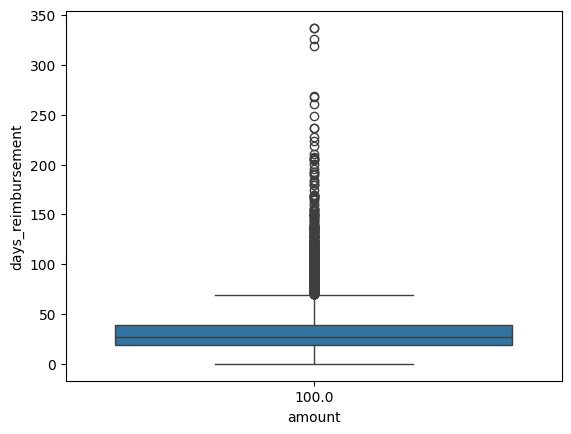

In [73]:
data_100 = cohort_data_Day[cohort_data_Day["amount"] == 100] 
sns.boxplot(data=data_100, x="amount", y="days_reimbursement")

In [88]:
data_100 = prestamos_devueltos[prestamos_devueltos["amount"] == 100]
data_100.describe()

,id,amount,user_id,deleted_account_id,cash_request_received_date,days_reimbursement
count,11050.000000,11050.0,10560.000000,491.000000,10480,11050.000000
mean,13624.903620,100.0,30115.884943,13863.802444,2020-08-17 08:57:23.358778624,33.801538
min,9.000000,100.0,47.000000,262.000000,2019-12-11 00:00:00,0.000000
25%,6920.250000,100.0,9304.000000,4485.000000,2020-07-07 00:00:00,19.000000
50%,14172.000000,100.0,19655.000000,13975.000000,2020-08-25 00:00:00,27.000000
75%,20439.500000,100.0,43408.750000,21682.000000,2020-10-12 00:00:00,37.000000
max,27010.000000,100.0,103719.000000,30404.000000,2020-11-11 00:00:00,375.000000
std,7754.495831,0.0,27333.619790,8320.932186,NaN,25.693205


In [95]:

limit_outliers = (37 - 19) * 1.5 
limit_outliers += 37

data_filetr = prestamos_devueltos[prestamos_devueltos["days_reimbursement"] > (limit_outliers)]

data_filetr

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,days_reimbursement
72,2271,100.0,money_back,2020-05-28 23:21:24.988386+00:00,2020-09-18 07:45:25.747540+00:00,10503.0,2020-05-29 07:40:54.629978+00:00,NaN,2020-06-08 22:00:00+00:00,2020-06-01,2020-09-18 07:45:25.740402+00:00,regular,NaT,completed,2020-06-12 22:30:08.558561+00:00,2020-09-18 07:45:25.761696+00:00,112
222,2211,100.0,money_back,2020-05-27 10:23:16.961762+00:00,2020-06-28 15:40:27.166070+00:00,3045.0,2020-05-27 13:07:30.446702+00:00,NaN,2020-07-31 22:00:00+00:00,2020-05-29,2020-08-02 22:00:00+00:00,regular,NaT,NaN,NaT,NaT,67
513,1324,100.0,money_back,2020-04-22 18:08:45.336656+00:00,2020-07-07 18:07:22.921772+00:00,3255.0,2020-04-23 09:42:14.924235+00:00,NaN,2020-06-05 22:00:00+00:00,2020-04-23,2020-07-07 18:07:22.921574+00:00,regular,NaT,completed,2020-06-12 22:19:38.646877+00:00,2020-07-07 18:07:22.931825+00:00,75
787,3255,100.0,money_back,2020-06-13 15:33:48.343530+00:00,2020-12-18 13:08:30.871443+00:00,12459.0,2020-06-14 14:15:16.562099+00:00,NaN,2020-09-06 09:49:41.399000+00:00,2020-06-16,2020-09-27 22:00:00+00:00,regular,NaT,NaN,NaT,NaT,106
814,16885,100.0,money_back,2020-09-19 14:41:17.233684+00:00,2020-12-18 13:08:31.047120+00:00,22673.0,NaT,NaN,2020-11-05 22:00:00+00:00,2020-09-29,2020-12-04 00:51:15.636537+00:00,regular,2020-09-26 14:41:17.182890+00:00,completed,2020-11-18 22:14:50.691127+00:00,2020-12-04 00:51:15.660436+00:00,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23963,7930,100.0,money_back,2020-07-14 08:55:09.360786+00:00,2021-02-05 12:04:06.194796+00:00,31413.0,2020-07-14 12:00:53.394529+00:00,NaN,2020-08-05 22:00:00+00:00,2020-07-16,2021-02-05 12:04:06.144421+00:00,regular,NaT,completed,2020-08-11 22:25:55.349356+00:00,2021-02-05 12:04:06.147841+00:00,206
23964,16834,100.0,money_back,2020-09-19 07:37:14.351567+00:00,2021-02-05 12:11:58.186458+00:00,20064.0,2020-09-19 15:37:54.670099+00:00,NaN,2020-10-05 22:00:00+00:00,2020-09-22,2021-02-05 12:11:58.131036+00:00,instant,2020-09-26 07:37:14.299162+00:00,completed,2020-10-15 22:27:12.949488+00:00,2021-02-05 12:11:58.134306+00:00,139
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681.0,NaT,NaN,2021-02-06 11:00:00+00:00,2020-10-13,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,NaN,NaT,NaT,117
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-21,2021-02-05 12:19:30.626289+00:00,instant,2020-10-20 07:58:14.171553+00:00,NaN,NaT,NaT,108
